In [50]:
%matplotlib inline
import datetime as datetime
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = '14'
import numpy as np
import pandas as pd

## Loading DataFrames

In [2]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,Sénégal
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,United Kingdom
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,United States
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,België / Belgique / Belgien


In [3]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe_p5.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [11]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238918,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

In [33]:
# Functions for preparing the dataframe
# --- Read keywords from file and return them as list
def prepare_keywords(file):
    keys = pd.read_csv(file)
    s = ''
    return [(s+word) for word in keys['keywords']]

# --- Create new column with value=1 if keyword is in tweet and value=0 if not
def covid_relation(df, keylist):
    return df.assign(covid_related=df['text_processed'].apply(lambda t: 1 if any(f" {keyword} " in ' '.join(t) for keyword in keylist) else 0))

# --- Create new column by inverting the column created above
def no_covid_relation(df, keylist):
    return df.assign(not_covid_related=df['covid_related'].apply(lambda t: 0 if t==1 else 1))

In [34]:
# Functions for plotting
# --- Detrender removes trends over period to better identify significant short time changes
def detrender(df, periods=None, method=None):
    periods = 30 if periods is None else periods
    func = np.mean if method is None else method

    return df - df.rolling(periods).apply(func)

# --- Put the data in the dataframe in units of deviation from the mean.
def standardize(df):
    return (df - df.mean()) / df.std()

# --- Plots input dataframe and adds lines for sigma-levels 1 to 3
def make_normalplot(df, random=True):
    if random:
        plt.plot(df.index.values,
                 np.random.normal(size=df.shape[0]),
                 lw=0.8,
                 alpha=0.75)
        plt.ylim((-5, 5))
        plt.title("Generated normal time series with $\sigma$ bands")
    else:
        plt.plot(df.index.values, df.values, lw=0.8, alpha=0.75)
        #plt.ylim((-5, 8))
        plt.title("Dataframe with bands showing up to 3 sigma")

    plt.axhline(y=1, color="red")
    plt.axhline(y=-1, color="red")
    plt.axhline(y=2, color="orange")
    plt.axhline(y=-2, color="orange")
    plt.axhline(y=3, color="yellow")
    plt.axhline(y=-3, color="yellow")

    arrowprops = dict(arrowstyle="-",
                      color="black",
                      lw=2)

    #textprops = dict(rotation="vertical", fontsize=16)
    textprops = dict()

    plt.annotate("1 $\sigma$",
                 xy=(df.index.values[10], 1),
                 xytext=(df.index.values[10], -1.5),
                 arrowprops=arrowprops,
                 **textprops)

    plt.annotate("2 $\sigma$",
                 xy=(df.index.values[50], 2),
                 xytext=(df.index.values[50], -2.5),
                 arrowprops=arrowprops,
                 **textprops
                 )

    plt.annotate("3 $\sigma$",
                 xy=(df.index.values[100], 3),
                 xytext=(df.index.values[100], -3.5),
                 arrowprops=arrowprops,
                 **textprops
                 )
        
#make_normalplot(ddf, random=True)

# --- Plot input dataframe and add date_markers
def plot_ts(series,
            ma=False,
            raw=False,
            expanding=False,
            ewma=False,
            overall=False,
            median=False,
            title=None,
            time_bin="hour",
            date_markers=None,
            y_label=None,
            custom_yaxis=None,
            custom_ax=None,
            **kwargs):
    """
    custom plotting function for our time-series dataframes. 
    Args:
        series: pd.Series or pd.Dataframe
        raw: plot the basic values in the frame
        expanding: plot an expanding mean
        ewma: plot an ewma line
        overall: plot an overall mean
        median: plot the overall median
        title: custom title to use
        time_bin: marks the y-axis correctly
        date_markers: plots a dot on the signal where a given date is noted.
        y_label: custom y-axis label
        custom_yaxis: custom axis
        custom_ax: passing a custom Axes here will assign this plot to that
                   axis
   """
    if isinstance(series, pd.DataFrame):
        series = series["counts"]

    lw = 0.75
    if custom_ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    else:
        ax = custom_ax

    if y_label is None:
        period = series.index.to_period().freqstr
        _bin = "day" if period == "D" else "hour"
        _y_label = "tweets per {}".format(_bin)
        plt.ylabel(_y_label)
    else:
        if isinstance(y_label, str):
            plt.ylabel(y_label)

    if date_markers is not None:
        def dateindex_to_str(index, include_hour=True):
            idx = 16 if include_hour else 10
            return [str(date)[0:idx].replace("T", " ")
                    for date in index.values]

        (ax.plot(date_markers, series.loc[date_markers],
                 "o", markersize=4, color='m', label="point"))

    if raw:
        series.plot(label="raw", lw=lw, ax=ax)

    if ma:
        (series.rolling(ma).mean()
         .plot(ax=ax, label="{}{} ma".format(ma, time_bin), lw=lw))

    if ewma:
        if isinstance(ewma, int):
            (series.ewm(span=ewma).mean()
             .plot(ax=ax, label="emwa - span {}".format(ewma), lw=lw))
        else:
            (series.ewm(alpha=0.05).mean()
             .plot(ax=ax, label="emwa, $\alpha = 0.05$", lw=lw))

    if expanding:
        series.expanding().mean().plot(ax=ax, label="expanding_mean", lw=lw)

    if overall:
        (pd.DataFrame(series)
         .assign(global_mean=lambda x: x['count']
                 .mean())["global_mean"]
         .plot(ax=ax, label="global_mean", lw=lw))

    if median:
        (pd.DataFrame(series)
         .assign(global_median=lambda x: x['count'].median())["global_median"]
         .plot(ax=ax, label="global_median"))

    plt.tight_layout()
    plt.xlabel("datetime")

    if custom_yaxis is not None:
        def log_axis(x, pos):
            'The two args are the value and tick position'
            str_ = '$' + "2^{" + str(x) + "}" + '$'
            return str_
        formatter = FuncFormatter(log_axis)
        ax.yaxis.set_major_formatter(formatter)

    if title:
        ax.set_title(title)
    if custom_ax is not None:
        return
    else:
        return ax

#plt.rcParams["figure.figsize"] = (20,5)
#plot_ts(ddf, raw=True, title="$ln$ transformed standardized $\Delta$ Tweets from previous hour")

## Analysis Hypothesis A1.2

##### Import keywords

In [7]:
# Load keywords identified in the "Coronavirus (COVID-19) Tweets Dataset" by Lamsal
keylist = prepare_keywords('keywords.txt')
keylist

['corona',
 '#corona',
 'coronavirus',
 '#coronavirus',
 'covid',
 '#covid',
 'covid19',
 '#covid19',
 'covid-19',
 '#covid-19',
 'sarscov2',
 '#sarscov2',
 'sars cov2',
 'sars cov 2',
 'covid_19',
 '#covid_19',
 '#ncov',
 'ncov',
 '#ncov2019',
 'ncov2019',
 '2019-ncov',
 '#2019-ncov',
 'pandemic',
 '#pandemic',
 '#2019ncov',
 '2019ncov',
 'quarantine',
 '#quarantine',
 'flatten the curve',
 'flattening the curve',
 '#flatteningthecurve',
 '#flattenthecurve',
 'hand sanitizer',
 '#handsanitizer',
 '#lockdown',
 'lockdown',
 'social distancing',
 '#socialdistancing',
 'work from home',
 '#workfromhome',
 'working from home',
 '#workingfromhome',
 'ppe',
 'n95',
 '#ppe',
 '#n95',
 '#covidiots',
 'covidiots',
 'herd immunity',
 '#herdimmunity',
 'pneumonia',
 '#pneumonia',
 'chinese virus',
 '#chinesevirus',
 'wuhan virus',
 '#wuhanvirus',
 'kung flu',
 '#kungflu',
 'wearamask',
 '#wearamask',
 'wear a mask',
 'vaccine',
 'vaccines',
 '#vaccine',
 '#vaccines',
 'corona vaccine',
 'corona 

##### Check tweets for COVID-keywords

In [12]:
# Drop columns not needed for this analysis,
# then check if tweet contains COVID keywords
# and add inversion of check as another column
ctdf = (tdf
       .drop(columns=['author_id', 'text', 'created_truncated', 'referenced_type',
                      'entities.mentions', 'entities.annotations', 'entities.hashtags',
                      'is_reply', 'length', 'public_metrics.followers_count'])
       .pipe(covid_relation, keylist)
       .pipe(no_covid_relation, keylist)
      )
ctdf

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related
0,2021-09-12 13:52:15+00:00,"[thanking, god, historic, moment, church, hist...",1,AACC-CETA,Kenya,0,1
1,2021-09-12 13:51:49+00:00,"[another, important, step, road, #justicedigni...",1,AACC-CETA,Kenya,0,1
2,2021-09-12 09:04:41+00:00,"[congratulations, ven, rose, okeno, ack, dioce...",1,AACC-CETA,Kenya,0,1
3,2021-09-12 08:50:59+00:00,"[consecration, service, ven, rose, okeno, ack,...",1,AACC-CETA,Kenya,0,1
4,2021-09-12 07:37:22+00:00,"[looking, forward, today, consecration, enthro...",1,AACC-CETA,Kenya,0,1
...,...,...,...,...,...,...,...
238918,2019-01-09 09:50:09+00:00,"[new, year, message, nation, proffered, areas,...",1,Zimbabwe Council of Churches,NaN,0,1
238919,2019-01-09 09:38:02+00:00,"[launched, fresh, bid, broker, dialogue, presi...",1,Zimbabwe Council of Churches,NaN,0,1
238920,2019-01-09 07:38:41+00:00,"[choose, route, engagement, conflict, route, i...",1,Zimbabwe Council of Churches,NaN,0,1
238921,2019-01-08 08:03:13+00:00,"[many, zimbabweans, come, amidst, much, hardsh...",1,Zimbabwe Council of Churches,NaN,0,1


In [13]:
# Add columns for all keywords with value=1 if tweet contains the keyword

for keyword in keylist:
    ctdf[keyword] = ctdf['text_processed'].apply(lambda t: 1 if f" {keyword} " in ' '.join(t) else 0)

ctdf

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related,corona,#corona,coronavirus,...,wash ur hands,wash your hands,#washurhands,#washyourhands,#stayathome,#stayhome,#selfisolating,self isolating,bars closed,resturant closed
0,2021-09-12 13:52:15+00:00,"[thanking, god, historic, moment, church, hist...",1,AACC-CETA,Kenya,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-09-12 13:51:49+00:00,"[another, important, step, road, #justicedigni...",1,AACC-CETA,Kenya,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-09-12 09:04:41+00:00,"[congratulations, ven, rose, okeno, ack, dioce...",1,AACC-CETA,Kenya,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-09-12 08:50:59+00:00,"[consecration, service, ven, rose, okeno, ack,...",1,AACC-CETA,Kenya,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-09-12 07:37:22+00:00,"[looking, forward, today, consecration, enthro...",1,AACC-CETA,Kenya,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238918,2019-01-09 09:50:09+00:00,"[new, year, message, nation, proffered, areas,...",1,Zimbabwe Council of Churches,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238919,2019-01-09 09:38:02+00:00,"[launched, fresh, bid, broker, dialogue, presi...",1,Zimbabwe Council of Churches,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238920,2019-01-09 07:38:41+00:00,"[choose, route, engagement, conflict, route, i...",1,Zimbabwe Council of Churches,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238921,2019-01-08 08:03:13+00:00,"[many, zimbabweans, come, amidst, much, hardsh...",1,Zimbabwe Council of Churches,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Prepare dataframe for timeseries analysis

In [14]:
# Create new dataframe including only keyword columns
# then get total number of COVID-related tweets/day
ddf = (ctdf
        .drop(columns=['text_processed', 'name', 'country'])
        .loc[:, (ctdf != 0).any(axis=0)]
        .set_index('created_at')
        .sort_index()
        .resample('d')
        .sum()
       )

ddf

# The line below can be un-commented and used to check correct execution (should contain only zeros)
#ddf.insert(loc=1, column='not_covid_related', value=ddf['tweet_count']-ddf['covid_related'])


,tweet_count,covid_related,not_covid_related,corona,#corona,coronavirus,#coronavirus,covid,#covid,#covid19,...,#healthworkers,#stayhomestaysafe,#frontlineheroes,#coronawarriors,#homeschooling,#washyourhands,#stayathome,#stayhome,#selfisolating,self isolating
created_at,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,123,0,123,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-02 00:00:00+00:00,182,0,182,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-03 00:00:00+00:00,213,0,213,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-04 00:00:00+00:00,206,0,206,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-05 00:00:00+00:00,98,0,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08 00:00:00+00:00,204,8,196,0,0,0,0,3,0,2,...,0,0,0,0,0,0,0,0,0,0
2021-09-09 00:00:00+00:00,190,8,182,0,0,0,0,4,0,2,...,0,0,0,0,0,0,0,0,0,0
2021-09-10 00:00:00+00:00,215,8,207,0,0,0,0,2,0,4,...,0,0,0,0,0,0,0,0,0,0


##### Check for the significance of change towards usage of COVID-related terms

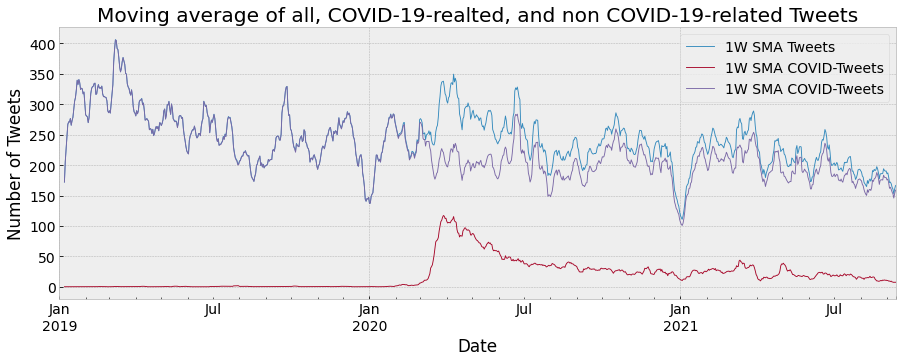

In [21]:
# This first graph is meant to get a general overview by
# plotting a timeseries analysis for all tweets (blue),
# for non COVID-related (purple) and for COVID-related (red) tweets

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))

(ddf['tweet_count']
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA Tweets'));

(ddf['covid_related']
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA COVID-Tweets'));

(ddf['not_covid_related']
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA COVID-Tweets'));

axes.legend()
axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of all, COVID-19-realted, and non COVID-19-related Tweets')
plt.savefig('A1_2 Timeseries analysis of all, non covid, covid tweets.png', bbox_inches='tight')

In [24]:
# Calculate percentage of tweets/day that are COVID-related

ddf_perc_ges = (ddf[['not_covid_related', 'covid_related']]
                .divide(ddf[['not_covid_related', 'covid_related']].sum(axis=1), axis=0)
               )

# Get maximum percentage of COVID-related tweets
ddf_perc_ges['covid_related'].max()

0.4092140921409214

In [25]:
# Show period of time with highest COVID-percentage to identify day with highest percentage

(ddf_perc_ges
 .loc[(ddf_perc_ges.index >= '2020-04-01') &
      (ddf_perc_ges.index < '2020-04-15')]
)

,not_covid_related,covid_related
created_at,,
2020-04-01 00:00:00+00:00,0.687345,0.312655
2020-04-02 00:00:00+00:00,0.677419,0.322581
2020-04-03 00:00:00+00:00,0.665860,0.334140
2020-04-04 00:00:00+00:00,0.666667,0.333333
2020-04-05 00:00:00+00:00,0.836735,0.163265
2020-04-06 00:00:00+00:00,0.637333,0.362667
2020-04-07 00:00:00+00:00,0.590786,0.409214
2020-04-08 00:00:00+00:00,0.643045,0.356955
2020-04-09 00:00:00+00:00,0.695740,0.304260


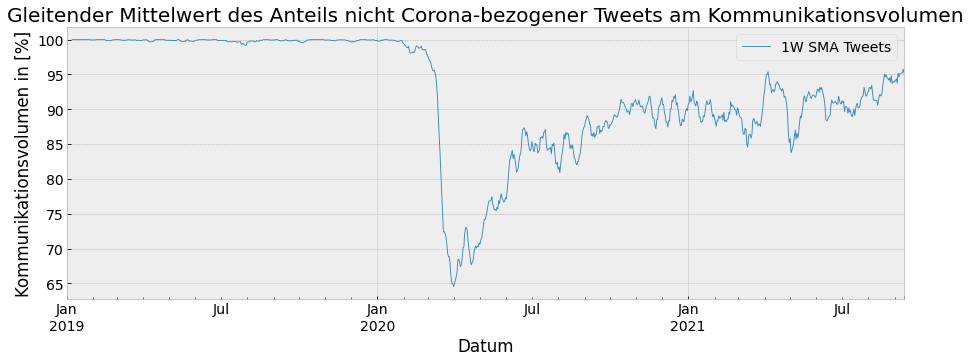

In [21]:
# Plot timeseries of 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))

(ddf_perc_ges['not_covid_related']
 .multiply(100)
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA Tweets'));

axes.legend()
axes.set_xlabel('Date')
axes.set_ylabel('Kommunikationsvolumen in [%]')
axes.set_title('Gleitender Mittelwert des Anteils nicht Corona-bezogener Tweets am Kommunikationsvolumen')
plt.savefig('A1_2 Zeitreihenanalyse nicht Corona-bezogener Kommunikation.png', bbox_inches='tight')

           counts
count  985.000000
mean    -0.005415
std      3.659927
min    -19.940136
25%     -0.869903
50%      0.000000
75%      0.831143
max     17.006803


c:\Users\johan\anaconda3\envs\vw_project_env\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\johan\AppData\Local\Temp\ipykernel_10012\2256456935.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('A1_2 Analysis of significance of non-COVID-19-related Communication Volume sigma levels.png', bbox_inches='tight', fontsize=20)


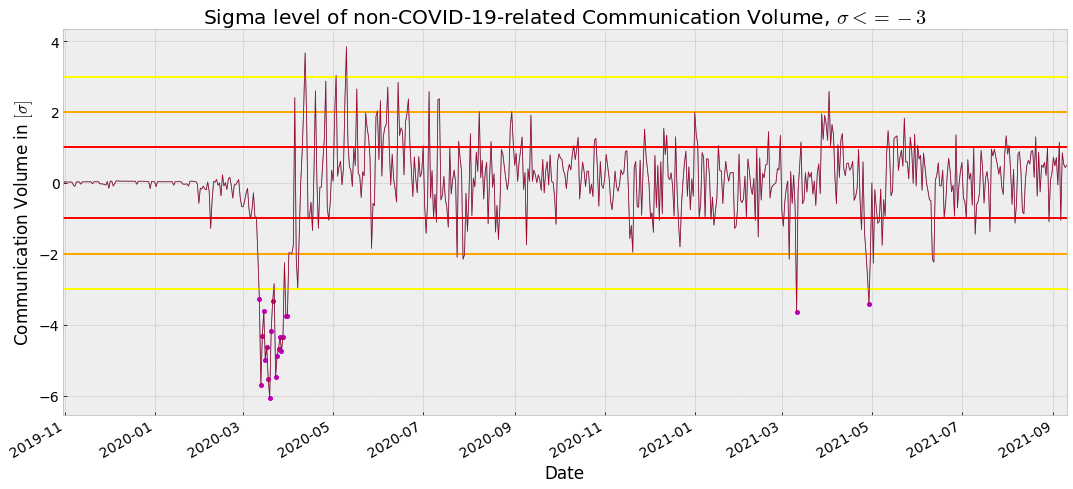

In [47]:
# Create dataframe with a single column containing the percentage of non COVID-related communication
counts_ddf = ddf_perc_ges['not_covid_related'].to_frame(name="counts").multiply(100)

# Print statistics regarding the relative change in non COVID-related communication compared to the day before
print(counts_ddf.diff().describe())

# Configure sigma-level threshold and plot size
UNIT_THRESHOLD = 3
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 7))

# Create first layer in plot - Plot sigma-level non COVID-related communication change
(counts_ddf
  .pipe(detrender)
  .dropna()
  .pipe(standardize)
  .pipe(make_normalplot, random=False))

# Create second layer in plot - Plot same graph as in first layer but instead of sigma-level
# add date_markers showing all dates that are above a sigma-level 3 threshold
plot_ts(counts_ddf
        .pipe(detrender)
        .dropna()
        .pipe(standardize),
        raw=True,
        title=f"Sigma level of non-COVID-19-related Communication Volume, $\sigma <=-{UNIT_THRESHOLD}$",
        custom_ax=axes,
        date_markers=(counts_ddf
                      .pipe(detrender)
                      .dropna()
                      .pipe(standardize)
                      .query("counts <= -@UNIT_THRESHOLD")
                      .index));

axes.set_xlim(18200, 18880)
axes.set_xlabel('Date')
axes.set_ylabel(r'Communication Volume in $[\sigma]$')
plt.savefig('A1_2 Analysis of significance of non-COVID-19-related Communication Volume sigma levels.png', bbox_inches='tight', fontsize=20)

           counts
count  985.000000
mean    -0.005415
std      3.659927
min    -19.940136
25%     -0.869903
50%      0.000000
75%      0.831143
max     17.006803
DatetimeIndex(['2020-03-12 00:00:00+00:00', '2020-03-13 00:00:00+00:00',
               '2020-03-14 00:00:00+00:00', '2020-03-15 00:00:00+00:00',
               '2020-03-16 00:00:00+00:00', '2020-03-17 00:00:00+00:00',
               '2020-03-18 00:00:00+00:00', '2020-03-19 00:00:00+00:00',
               '2020-03-20 00:00:00+00:00', '2020-03-21 00:00:00+00:00',
               '2020-03-23 00:00:00+00:00', '2020-03-24 00:00:00+00:00',
               '2020-03-25 00:00:00+00:00', '2020-03-26 00:00:00+00:00',
               '2020-03-27 00:00:00+00:00', '2020-03-28 00:00:00+00:00',
               '2020-03-30 00:00:00+00:00', '2020-03-31 00:00:00+00:00',
               '2021-03-11 00:00:00+00:00', '2021-04-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', freq=None)


c:\Users\johan\anaconda3\envs\vw_project_env\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


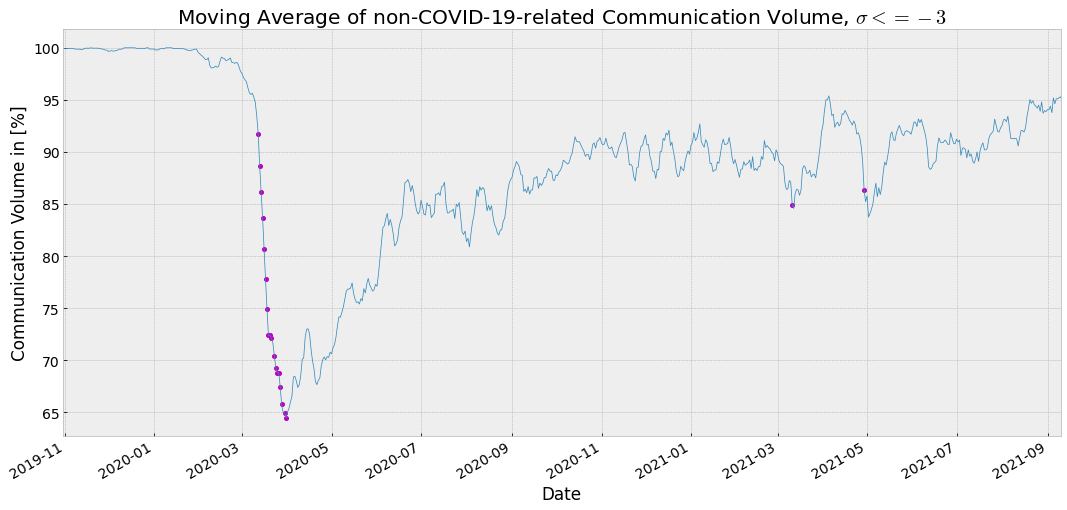

In [49]:
# Create dataframe with a single column containing the percentage of non COVID-related communication
counts_ddf = ddf_perc_ges['not_covid_related'].to_frame(name="counts").multiply(100)

# Print statistics regarding the relative change in non COVID-related communication compared to the day before
print(counts_ddf.diff().describe())

# Print all dates with sigma-level 3 threshold
print((counts_ddf
                .pipe(detrender)
                .dropna()
                .pipe(standardize)
                .query("counts <= -@UNIT_THRESHOLD")
                .index))

# Configure sigma-level threshold and plot size
UNIT_THRESHOLD = 3
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 7))

# Plot timeseries of non COVID-related communication percentage 
# with sigma-level 3 markers for dates with significant reduction of communication percentage
plot_ts(counts_ddf
        .rolling(7)
        .mean(),
        raw=True,
        title=f"Moving Average of non-COVID-19-related Communication Volume, $\sigma <=-{UNIT_THRESHOLD}$",
        custom_ax=axes,
        date_markers=(counts_ddf
                      .pipe(detrender)
                      .dropna()
                      .pipe(standardize)
                      .query("counts <= -@UNIT_THRESHOLD")
                      .index));

axes.set_xlim(18200, 18880)
axes.set_xlabel('Date')
axes.set_ylabel('Communication Volume in [%]')
plt.savefig('A1_2 Analysis of significance of non-COVID-19-related COmmunication Volume.png', bbox_inches='tight')